## Import libraries

In [75]:
import pandas as pd
import numpy as np
from google.colab import drive

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,\
        accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,StackingClassifier,ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from time import time
from datetime import timedelta

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

sns.set()


In [76]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    pred = pd.Series(pred)
    true = pd.Series(true)
    
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

def compute_metrics(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    f1_score_1 = f1_score(y_true,y_pred,average='binary',pos_label=1)
    f1_score_0 = f1_score(y_true,y_pred,average='binary',pos_label=0)
    f1_score_macro = f1_score(y_true,y_pred,average='macro')
    return [accuracy,f1_score_1,f1_score_0,f1_score_macro]
    
    

results = pd.DataFrame(columns=['Accuracy', 'F1-score (class 1)', 'F1-score (class 0)', 'F1-score (macro avg)'])

## Load dataset

In [77]:
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/ML/Machine Learning Project. GALINDO - PAGLIA/kickafterpreprocess.csv', sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Datos numericos y categoricos

In [78]:
df = df.drop(columns=['age_cat','VehOdo_cat', 'VehBCost_cat', 'WarrantyCost_cat'])
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df,drop_first=True)

In [79]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()

dfnum = df[['VehicleAge','VehOdo','VehBCost','WarrantyCost']]
escalar.fit(dfnum)
dfnum2=escalar.transform(dfnum)
dfnum=pd.DataFrame(dfnum2)
dfnum.columns =['VehicleAge','VehOdo','VehBCost','WarrantyCost']

In [80]:
df = pd.concat([df['IsBadBuy'],
                dfnum,
                df.iloc[:, 5:]
                ], axis='columns')
df.columns

Index(['IsBadBuy', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost',
       'Auction_MANHEIM', 'Auction_OTHER', 'SubModel_COUPE', 'SubModel_CUV',
       'SubModel_MINIVAN', 'SubModel_OTHER', 'SubModel_PASSENGER',
       'SubModel_SEDAN', 'SubModel_SPORT', 'SubModel_SUV', 'SubModel_WAGON',
       'Color_BLACK', 'Color_BLUE', 'Color_BROWN', 'Color_GOLD', 'Color_GREEN',
       'Color_GREY', 'Color_MAROON', 'Color_ORANGE', 'Color_OTHER',
       'Color_PURPLE', 'Color_RED', 'Color_SILVER', 'Color_WHITE',
       'Color_YELLOW', 'Transmission_MANUAL', 'WheelType_Covers',
       'WheelType_Special', 'Nationality_ASIAN', 'Nationality_OTHER',
       'Size_LARGE', 'Size_MEDIUM', 'Size_OTHER', 'Size_SUV', 'Size_TRUCK',
       'Size_VAN', 'VNST_EAST', 'VNST_WEST', 'IsOnlineSale_yes',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [81]:
from sklearn.model_selection import train_test_split
y=df['IsBadBuy']
X=df.drop(columns='IsBadBuy')
X_learn, X_test, y_learn, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.20, random_state=2022)

In [82]:
model_DT_num =DecisionTreeClassifier(criterion = 'gini', max_depth=None, min_samples_split = 9, min_samples_leaf = 1, max_features = None, random_state= 2022)

model_DT_num_fit=model_DT_num.fit(X_train,y_train)
y_pred=model_DT_num_fit.predict(X_val)
compute_metrics(y_val, y_pred)
results.loc['DT-best',:] = compute_metrics(y_val, y_pred)

confusion(y_val, y_pred)

predicted,0,1
target,,
0,9291,776
1,959,131


In [83]:
print(classification_report(y_val,
                            y_pred,
                            target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.91      0.92      0.91     10067
         yes       0.14      0.12      0.13      1090

    accuracy                           0.84     11157
   macro avg       0.53      0.52      0.52     11157
weighted avg       0.83      0.84      0.84     11157



,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.844492,0.131197,0.914604,0.5229


In [84]:
model_RF_num =RandomForestClassifier(n_estimators = 500,criterion = 'gini', max_depth=None, min_samples_split = 9,  min_samples_leaf = 9, max_features = None, random_state= 2022, class_weight= 'balanced_subsample')

model_RF_num_fit=model_RF_num.fit(X_train,y_train)
y_pred=model_RF_num_fit.predict(X_val)
compute_metrics(y_val, y_pred)
results.loc['RF-best',:] = compute_metrics(y_val, y_pred)

confusion(y_val, y_pred)



predicted,0,1
target,,
0,9523,544
1,947,143


In [85]:
print(classification_report(y_val,
                            y_pred,
                            target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.91      0.95      0.93     10067
         yes       0.21      0.13      0.16      1090

    accuracy                           0.87     11157
   macro avg       0.56      0.54      0.54     11157
weighted avg       0.84      0.87      0.85     11157



,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.844492,0.131197,0.914604,0.5229
RF-best,0.866362,0.160945,0.927399,0.544172


In [86]:
model_SVM_num=SVC(C=1, gamma= 32, kernel='linear', random_state=2022)

model_SVM_num_fit=model_SVM_num.fit(X_train,y_train)
y_pred=model_SVM_num_fit.predict(X_val)
compute_metrics(y_val, y_pred)
results.loc['SVM-best',:] = compute_metrics(y_val, y_pred)

In [87]:
print(classification_report(y_val,
                            y_pred,
                            target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.90      1.00      0.95     10067
         yes       0.00      0.00      0.00      1090

    accuracy                           0.90     11157
   macro avg       0.45      0.50      0.47     11157
weighted avg       0.81      0.90      0.86     11157



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.844492,0.131197,0.914604,0.5229
RF-best,0.866362,0.160945,0.927399,0.544172
SVM-best,0.902303,0.0,0.948643,0.474322


In [88]:
model_LR_num =LogisticRegression(C = 0.001, solver = 'lbfgs', max_iter = 10000, random_state= 2022)

model_LR_num_fit=model_LR_num.fit(X_train,y_train)
y_pred=model_LR_num_fit.predict(X_val)
compute_metrics(y_val, y_pred)
results.loc['LR-best',:] = compute_metrics(y_val, y_pred)

In [89]:
print(classification_report(y_val,
                            y_pred,
                            target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.90      1.00      0.95     10067
         yes       0.00      0.00      0.00      1090

    accuracy                           0.90     11157
   macro avg       0.45      0.50      0.47     11157
weighted avg       0.81      0.90      0.86     11157



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.844492,0.131197,0.914604,0.5229
RF-best,0.866362,0.160945,0.927399,0.544172
SVM-best,0.902303,0.0,0.948643,0.474322
LR-best,0.902303,0.0,0.948643,0.474322


## Metrics

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [91]:
y_final_pred = model_RF_num.predict(X_test)

print(classification_report(y_test,y_final_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     12637
           1       0.20      0.14      0.16      1310

    accuracy                           0.87     13947
   macro avg       0.56      0.54      0.55     13947
weighted avg       0.85      0.87      0.86     13947



In [92]:
confusion(y_test, y_final_pred)

predicted,0,1
target,,
0,11940,697
1,1131,179


In [93]:
cm = metrics.confusion_matrix(y_test, y_final_pred)

In [94]:
score = model_RF_num.score(X_val, y_val)
print(score)

0.8663619252487228


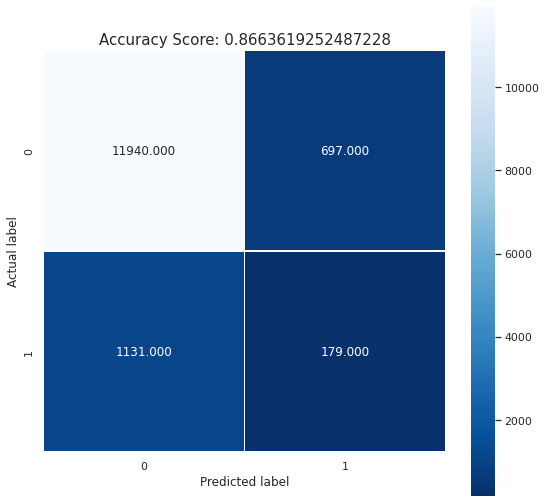

In [95]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);